<a href="https://colab.research.google.com/github/akanksha0911/HAC_SingleLinkage/blob/main/StarbucksHotbeveragesCluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libs and create the data frame with PTIndex and HBIndex points in assignment**

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering


point = ['A1','A2','B1','B2','C1','C2','C3','C4','D1','D2', 'E1', 
         'E2', 'F1', 'G1', 'G2', 'G3', 'H1', 'H2']
data = pd.DataFrame({'Point':point, 'PopularTimes':np.array([1, 1, 2, 2, 3, 3, 3, 3, 4, 4, 5, 5, 6, 7, 7, 7, 8, 8]),
                     'HotBeverages':np.array([5, 7, 6, 9, 6, 8, 9, 3, 8, 5, 4, 7, 9, 3, 9, 2, 1, 7])})
data = data.set_index('Point')
data

,PopularTimes,HotBeverages
Point,,
A1,1,5
A2,1,7
B1,2,6
B2,2,9
C1,3,6
C2,3,8
C3,3,9
C4,3,3
D1,4,8


**Visualize the data using a Scatter Plot**

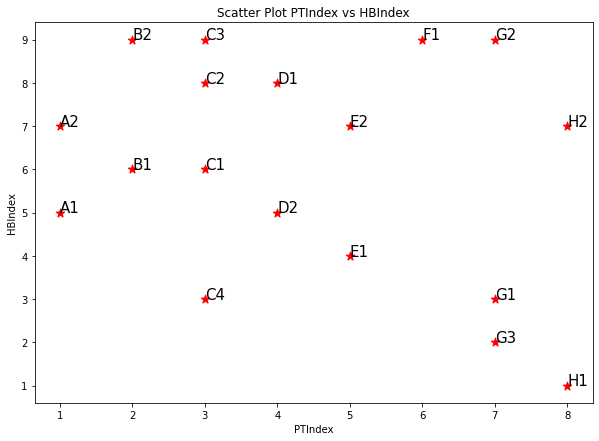

In [2]:
plt.figure(figsize=(10,7))
plt.scatter(data['PopularTimes'], data['HotBeverages'], s=80, c='r', marker='*')
plt.xlabel('PTIndex')
plt.ylabel('HBIndex')
plt.title('Scatter Plot PTIndex vs HBIndex')
for j in data.itertuples():
    plt.annotate(j.Index, (j.PopularTimes, j.HotBeverages), fontsize=15)

**Calculating the distance matrix in Euclidean method using pdist**

In [3]:
from scipy.spatial.distance import squareform, pdist
dist = pd.DataFrame(squareform(pdist(data[['PopularTimes', 'HotBeverages']]), 'euclidean'), columns=data.index.values, index=data.index.values)
dist

,A1,A2,B1,B2,C1,C2,C3,C4,D1,D2,E1,E2,F1,G1,G2,G3,H1,H2
A1,0.000000,2.000000,1.414214,4.123106,2.236068,3.605551,4.472136,2.828427,4.242641,3.000000,4.123106,4.472136,6.403124,6.324555,7.211103,6.708204,8.062258,7.280110
A2,2.000000,0.000000,1.414214,2.236068,2.236068,2.236068,2.828427,4.472136,3.162278,3.605551,5.000000,4.000000,5.385165,7.211103,6.324555,7.810250,9.219544,7.000000
B1,1.414214,1.414214,0.000000,3.000000,1.000000,2.236068,3.162278,3.162278,2.828427,2.236068,3.605551,3.162278,5.000000,5.830952,5.830952,6.403124,7.810250,6.082763
B2,4.123106,2.236068,3.000000,0.000000,3.162278,1.414214,1.000000,6.082763,2.236068,4.472136,5.830952,3.605551,4.000000,7.810250,5.000000,8.602325,10.000000,6.324555
C1,2.236068,2.236068,1.000000,3.162278,0.000000,2.000000,3.000000,3.000000,2.236068,1.414214,2.828427,2.236068,4.242641,5.000000,5.000000,5.656854,7.071068,5.099020
C2,3.605551,2.236068,2.236068,1.414214,2.000000,0.000000,1.000000,5.000000,1.000000,3.162278,4.472136,2.236068,3.162278,6.403124,4.123106,7.211103,8.602325,5.099020
C3,4.472136,2.828427,3.162278,1.000000,3.000000,1.000000,0.000000,6.000000,1.414214,4.123106,5.385165,2.828427,3.000000,7.211103,4.000000,8.062258,9.433981,5.385165
C4,2.828427,4.472136,3.162278,6.082763,3.000000,5.000000,6.000000,0.000000,5.099020,2.236068,2.236068,4.472136,6.708204,4.000000,7.211103,4.123106,5.385165,6.403124
D1,4.242641,3.162278,2.828427,2.236068,2.236068,1.000000,1.414214,5.099020,0.000000,3.000000,4.123106,1.414214,2.236068,5.830952,3.162278,6.708204,8.062258,4.123106
D2,3.000000,3.605551,2.236068,4.472136,1.414214,3.162278,4.123106,2.236068,3.000000,0.000000,1.414214,2.236068,4.472136,3.605551,5.000000,4.242641,5.656854,4.472136


**Look for the least distance and merge those into a cluster**

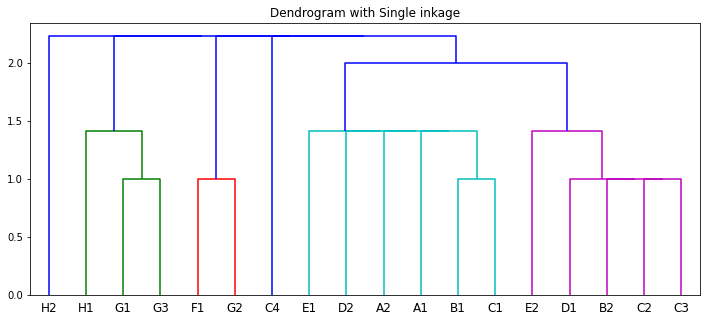

In [4]:
plt.figure(figsize=(12,5)) 
plt.title("Dendrogram with Single inkage")  
dend = shc.dendrogram(shc.linkage(data[['PopularTimes', 'HotBeverages']], method='single'), labels=data.index)

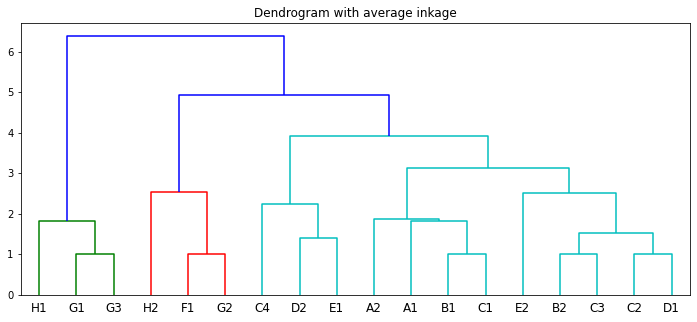

In [5]:
plt.figure(figsize=(12,5)) 
plt.title("Dendrogram with average inkage")  
dend = shc.dendrogram(shc.linkage(data[['PopularTimes', 'HotBeverages']], method='average'), labels=data.index)

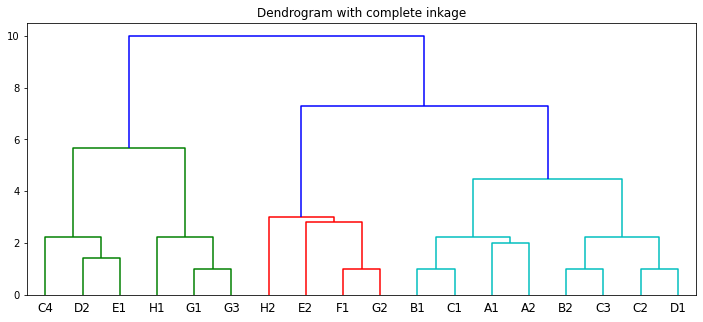

In [6]:
plt.figure(figsize=(12,5)) 
plt.title("Dendrogram with complete inkage")  
dend = shc.dendrogram(shc.linkage(data[['PopularTimes', 'HotBeverages']], method='complete'), labels=data.index)

[0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 1]
AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='single', memory=None, n_clusters=3)


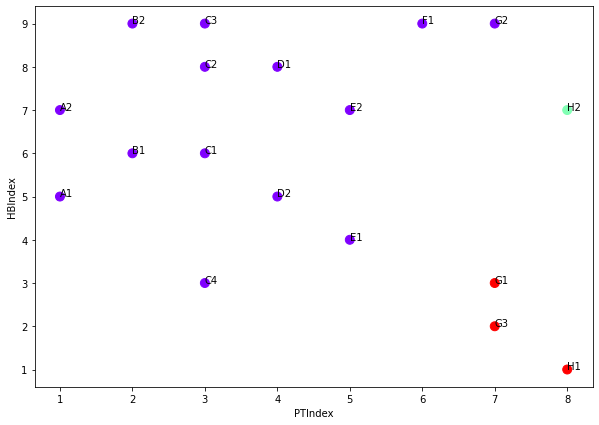

In [7]:
cluster1=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')
print(cluster1.fit_predict(data))
print(cluster1.fit(data))
labels = cluster1.labels_
plt.figure(figsize=(10, 7)) 
plt.scatter(data['PopularTimes'], data['HotBeverages'], c=labels, s=80, cmap ='rainbow')
plt.xlabel('PTIndex')
plt.ylabel('HBIndex')
for j in data.itertuples():
    plt.annotate(j.Index, (j.PopularTimes, j.HotBeverages), fontsize=10)

plt.show()


[0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 2]
AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=3)


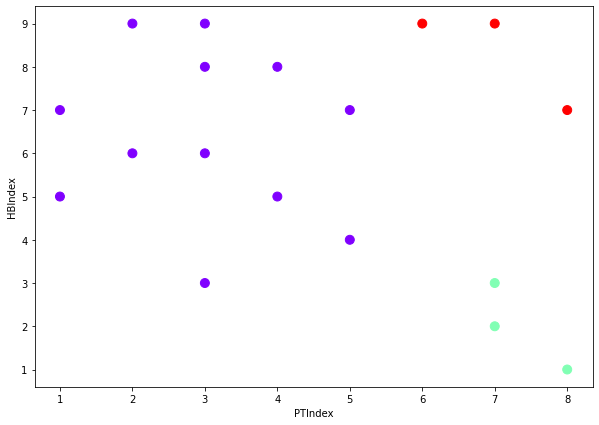

In [8]:
cluster2 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average') 
print(cluster2.fit_predict(data))
print(cluster2.fit(data))
plt.figure(figsize=(10, 7))  
plt.scatter(data['PopularTimes'], data['HotBeverages'], c=cluster2.labels_, s= 80, cmap='rainbow')  
plt.xlabel('PTIndex')
plt.ylabel('HBIndex')
plt.show() 

[1 1 1 1 1 1 1 0 1 0 0 2 2 0 2 0 0 2]
AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=3)


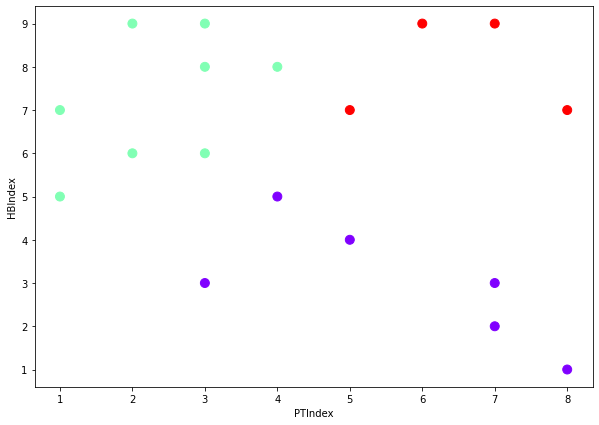

In [9]:
cluster3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete') 
print(cluster3.fit_predict(data))
print(cluster3.fit(data))
plt.figure(figsize=(10, 7))  
plt.scatter(data['PopularTimes'], data['HotBeverages'],c=cluster3.labels_, s=80, cmap='rainbow')  
plt.xlabel('PTIndex')
plt.ylabel('HBIndex')
plt.show() 

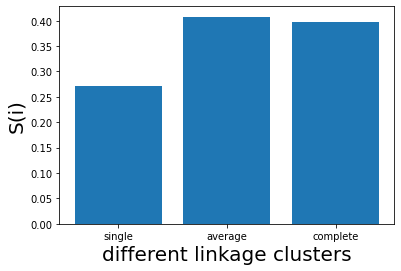

In [10]:
from sklearn.metrics import silhouette_score

c = ['single', 'average', 'complete']
silhouette_scores = []
silhouette_scores.append(
        silhouette_score(data, cluster1.fit_predict(data)))
silhouette_scores.append(
        silhouette_score(data, cluster2.fit_predict(data)))
silhouette_scores.append(
        silhouette_score(data, cluster3.fit_predict(data)))

silhouette_scores
# # Plotting a bar graph to compare the results
plt.bar(c, silhouette_scores)
plt.xlabel('different linkage clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()